<a href="https://colab.research.google.com/github/AlyssaAmod/UNN_BraTS23/blob/main/Data_from_Synapse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [394]:
pip install synapseclient

In [395]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import os
import random
from matplotlib.colors import ListedColormap

import json
from glob import iglob
import time
import numpy as np
from matplotlib import rcParams

from PIL import Image
import cv2
import re

In [396]:
import synapseclient
syn = synapseclient.Synapse()
syn.login(email='pearlyjoubert2@gmail.com', password='SPARK_BRATS_2023')
entity = syn.get("syn51692615")
GLI = syn.get("syn51514132")
# creating file path
filepath = entity.path
GLI_path = GLI.path
print(filepath)
pthPearly= filepath
data_dir = pthPearly
specific_string = "BraTS-"




[WARNING] Logging into Synapse via passwords will be deprecated by early 2024. This message will disappear if you use a Synapse Personal Access Token to login.


Welcome, pearlyjoubert2@gmail.com!



INFO:synapseclient_default:Welcome, pearlyjoubert2@gmail.com!



/root/.synapseCache/652/126867652/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData.zip


In [397]:
# unzipping
import zipfile

path_to_zip_file = pthPearly
directory_to_extract_to = "/content/sample_data/extracted_files"
if not os.path.exists(directory_to_extract_to):
    os.mkdir(directory_to_extract_to)
GLI_directory = "/content/sample_data/GLI_extracted"
if not os.path.exists(GLI_directory):
    os.mkdir(GLI_directory)

with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall(directory_to_extract_to)

with zipfile.ZipFile(GLI_path, 'r') as zip_ref:
    zip_ref.extractall(GLI_directory)



In [398]:
#make sure path is a directory
os.path.isdir(directory_to_extract_to)

True

In [399]:
# iterate over the folders and files in the path
for subdir, dirs, files in os.walk(directory_to_extract_to):
    for file in files:
        print(os.path.join(subdir, file))

/content/sample_data/extracted_files/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00050-000/BraTS-SSA-00050-000-t1c.nii.gz
/content/sample_data/extracted_files/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00050-000/BraTS-SSA-00050-000-t2f.nii.gz
/content/sample_data/extracted_files/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00050-000/BraTS-SSA-00050-000-t1n.nii.gz
/content/sample_data/extracted_files/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00050-000/BraTS-SSA-00050-000-t2w.nii.gz
/content/sample_data/extracted_files/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00050-000/BraTS-SSA-00050-000-seg.nii.gz
/content/sample_data/extracted_files/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00161-000/BraTS-SSA-00161-000-t2w.nii.gz
/content/sample_data/extracted_files/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2/BraTS-SSA-00161-000/BraTS-SSA-00161-000-seg.nii.gz
/content/sample_data

ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2
['BraTS-SSA-00050-000', 'BraTS-SSA-00161-000', 'BraTS-SSA-00144-000', 'BraTS-SSA-00152-000', 'BraTS-SSA-00025-000', 'BraTS-SSA-00074-000', 'BraTS-SSA-00096-000', 'BraTS-SSA-00055-000', 'BraTS-SSA-00002-000', 'BraTS-SSA-00056-000', 'BraTS-SSA-00133-000', 'BraTS-SSA-00221-000', 'BraTS-SSA-00215-000', 'BraTS-SSA-00135-000', 'BraTS-SSA-00076-000', 'BraTS-SSA-00146-000', 'BraTS-SSA-00068-000', 'BraTS-SSA-00012-000', 'BraTS-SSA-00127-000', 'BraTS-SSA-00150-000', 'BraTS-SSA-00119-000', 'BraTS-SSA-00220-000', 'BraTS-SSA-00113-000', 'BraTS-SSA-00093-000', 'BraTS-SSA-00080-000', 'BraTS-SSA-00081-000', 'BraTS-SSA-00046-000', 'BraTS-SSA-00116-000', 'BraTS-SSA-00015-000', 'BraTS-SSA-00213-000', 'BraTS-SSA-00230-000', 'BraTS-SSA-00049-000', 'BraTS-SSA-00121-000', 'BraTS-SSA-00202-000', 'BraTS-SSA-00008-000', 'BraTS-SSA-00011-000', 'BraTS-SSA-00110-000', 'BraTS-SSA-00010-000', 'BraTS-SSA-00078-000', 'BraTS-SSA-00120-000', 'BraTS-SSA-00223-000', 'Bra

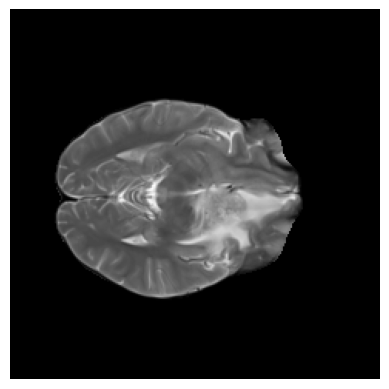

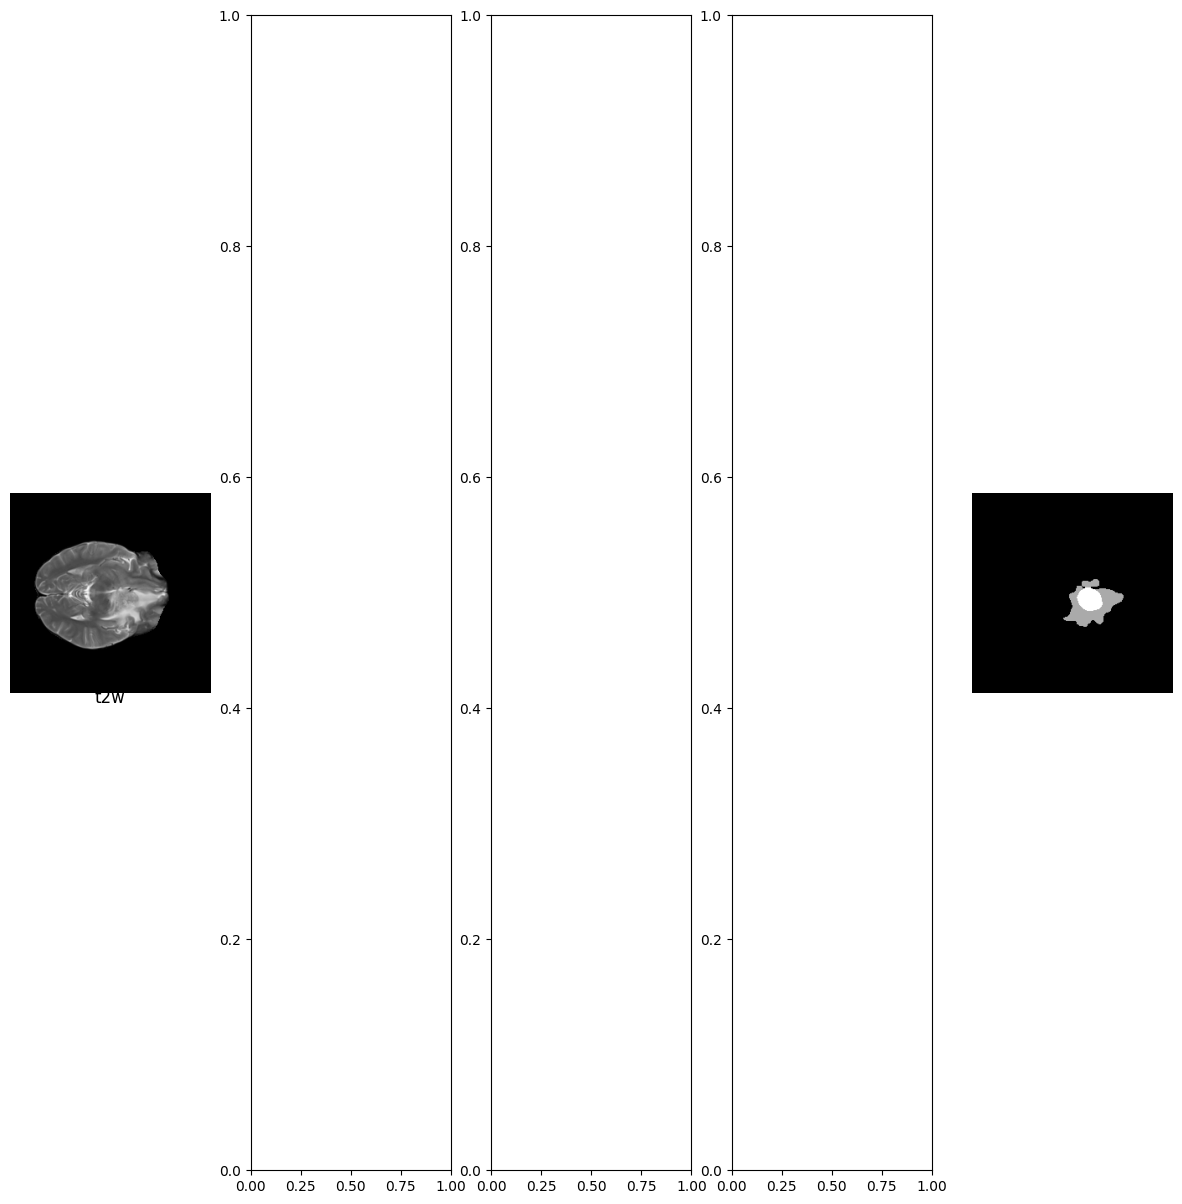

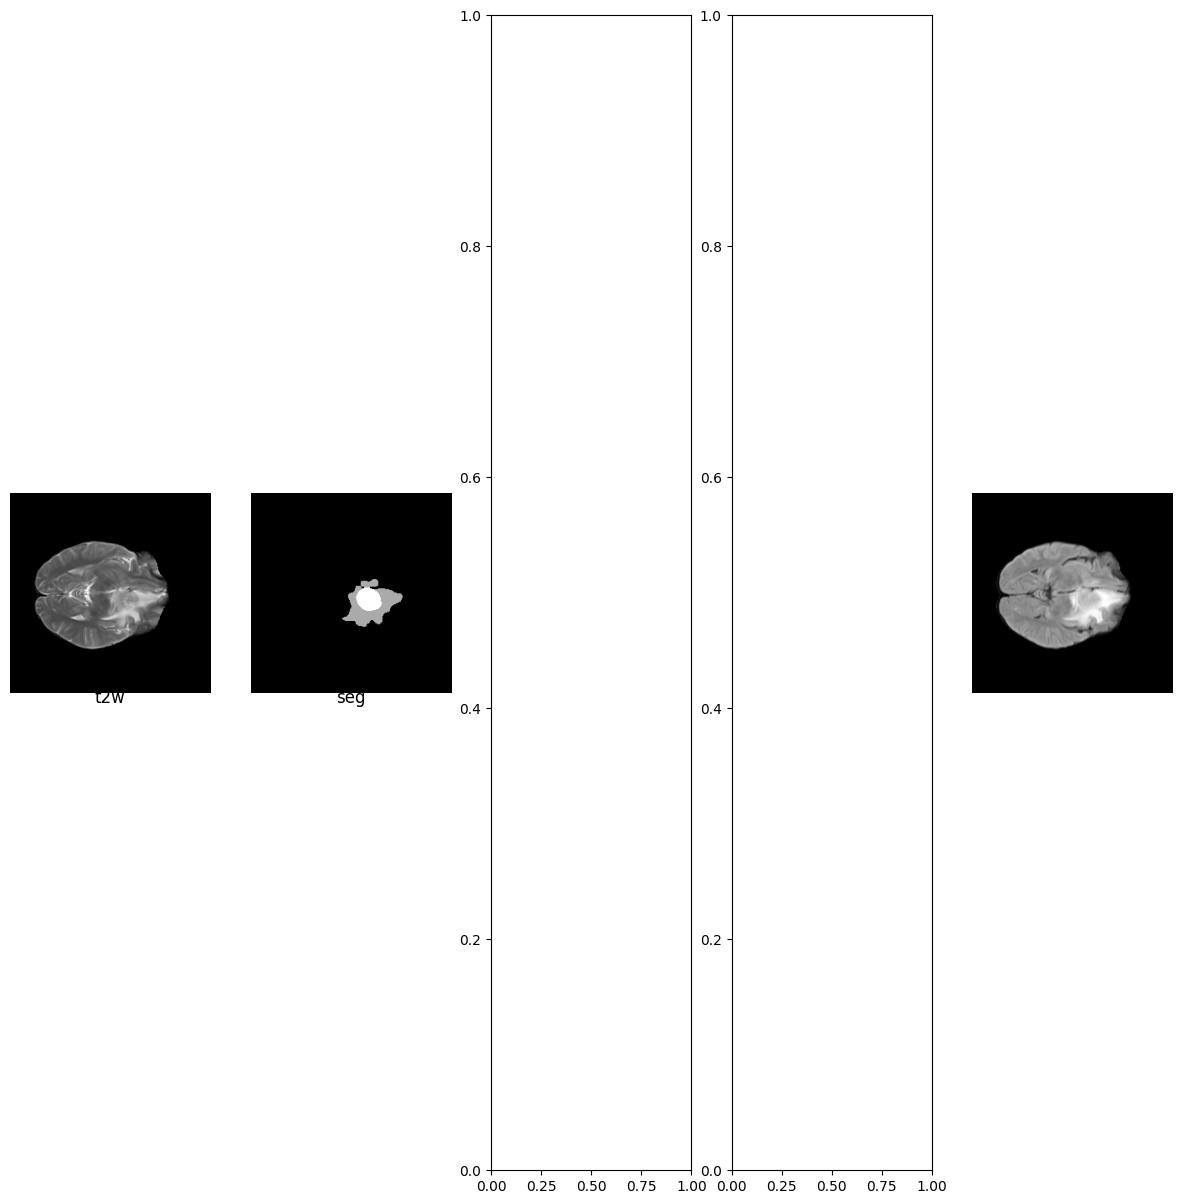

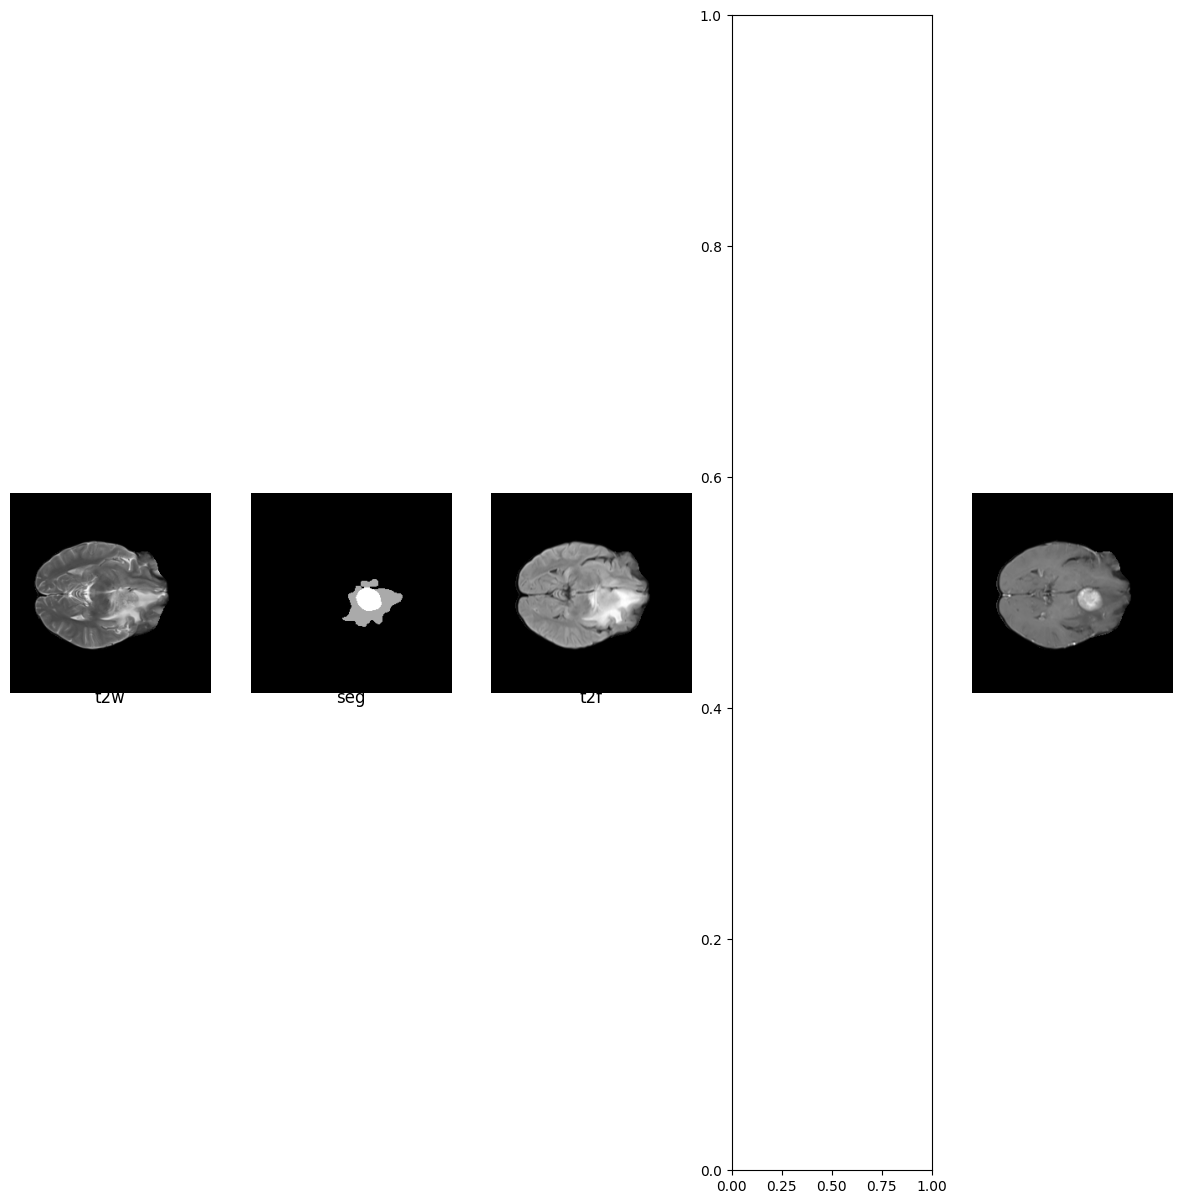

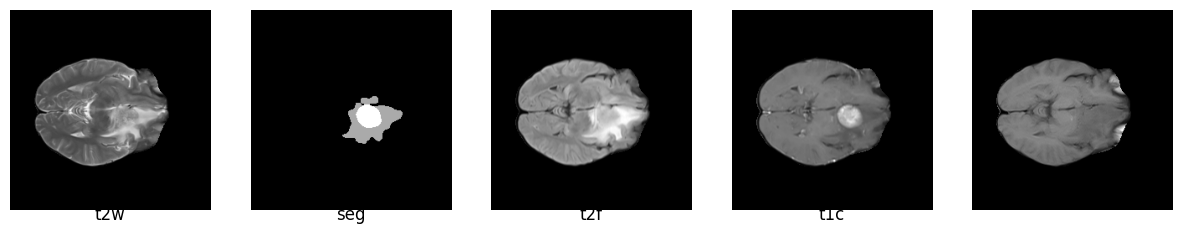

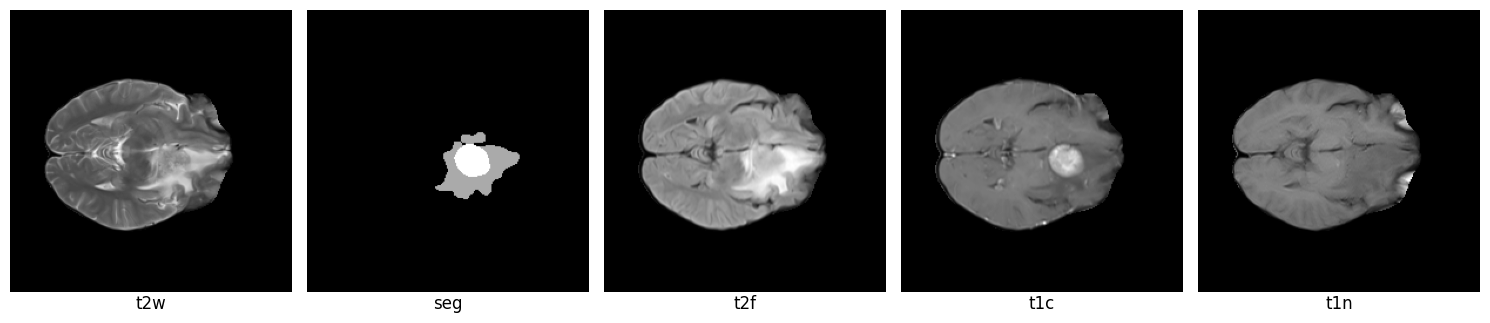

In [400]:
#randomly choose a folder and print the files in the folder
import random

def choose_folder_and_print_files(directory_to_extract_to):
    # Get a list of all the folders in the specified directory path
    folders = [folder for folder in os.listdir(directory_to_extract_to) if os.path.isdir(os.path.join(directory_to_extract_to, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    selected_folder_path = os.path.join(directory_to_extract_to, selected_folder)

    # Get a list of all the files inside the selected folder
    files = os.listdir(selected_folder_path)
    print(files)
    #random_number = random.randint(0, 61)
    use_file = random.choice(files)
    selected_subfolder_path = os.path.join(directory_to_extract_to, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    folder_path = "/content/sample_data/saved_images/"
    if not os.path.exists(folder_path):
      os.mkdir(folder_path)
    # Print the files in the folder

    # Load the image


    labels_SSA = []
    SSA_loop = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image

          img = nib.load(item_path)

          data = np.array(img.dataobj)


          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[:, :, 75]
          plt.imshow(image, cmap='gray')
          plt.axis('off')
          plt.savefig(os.path.join(folder_path + "-" + Patient + "-" +  mod_type + '.eps'))
          #plt.show()

          SSA_loop.append(image)
          labels_SSA.append(mod_type)
          print(labels_SSA)

        fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        for i, img in enumerate(SSA_loop):
         ax[i].imshow(img, cmap='gray')
         ax[i].axis('off')
         ax[i].set_title(labels_SSA[i], y=-0.09)

    subplot_path = "/content/sample_data/subplot_SSA/"
    if not os.path.exists(subplot_path):
      os.mkdir(subplot_path)
    plt.tight_layout()
    plt.savefig(os.path.join(subplot_path + "SSA" + "-" +  Patient +  '.eps'), bbox_inches='tight')
    plt.show()





# Example usage

choose_folder_and_print_files(directory_to_extract_to)

ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData
['BraTS-GLI-01127-000', 'BraTS-GLI-01119-000', 'BraTS-GLI-01008-000', 'BraTS-GLI-00645-000', 'BraTS-GLI-01407-000', 'BraTS-GLI-00491-001', 'BraTS-GLI-01081-000', 'BraTS-GLI-01076-000', 'BraTS-GLI-01525-000', 'BraTS-GLI-01272-000', 'BraTS-GLI-01025-000', 'BraTS-GLI-00641-000', 'BraTS-GLI-01062-000', 'BraTS-GLI-01537-000', 'BraTS-GLI-00607-001', 'BraTS-GLI-00413-000', 'BraTS-GLI-00127-000', 'BraTS-GLI-00567-000', 'BraTS-GLI-01105-000', 'BraTS-GLI-01352-000', 'BraTS-GLI-01358-000', 'BraTS-GLI-00684-000', 'BraTS-GLI-01228-000', 'BraTS-GLI-01665-000', 'BraTS-GLI-00099-001', 'BraTS-GLI-01145-000', 'BraTS-GLI-01330-000', 'BraTS-GLI-00656-000', 'BraTS-GLI-00568-000', 'BraTS-GLI-01266-000', 'BraTS-GLI-00044-000', 'BraTS-GLI-01244-000', 'BraTS-GLI-00707-000', 'BraTS-GLI-00155-000', 'BraTS-GLI-00058-001', 'BraTS-GLI-00429-000', 'BraTS-GLI-01160-001', 'BraTS-GLI-01456-000', 'BraTS-GLI-01485-000', 'BraTS-GLI-01115-000', 'BraTS-GLI-01529-000', 'BraTS-

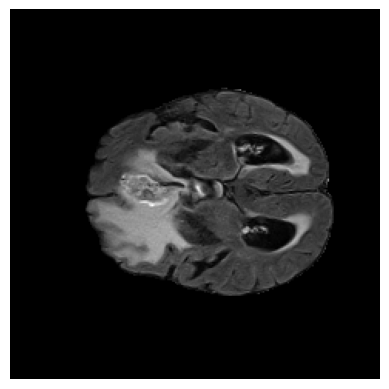

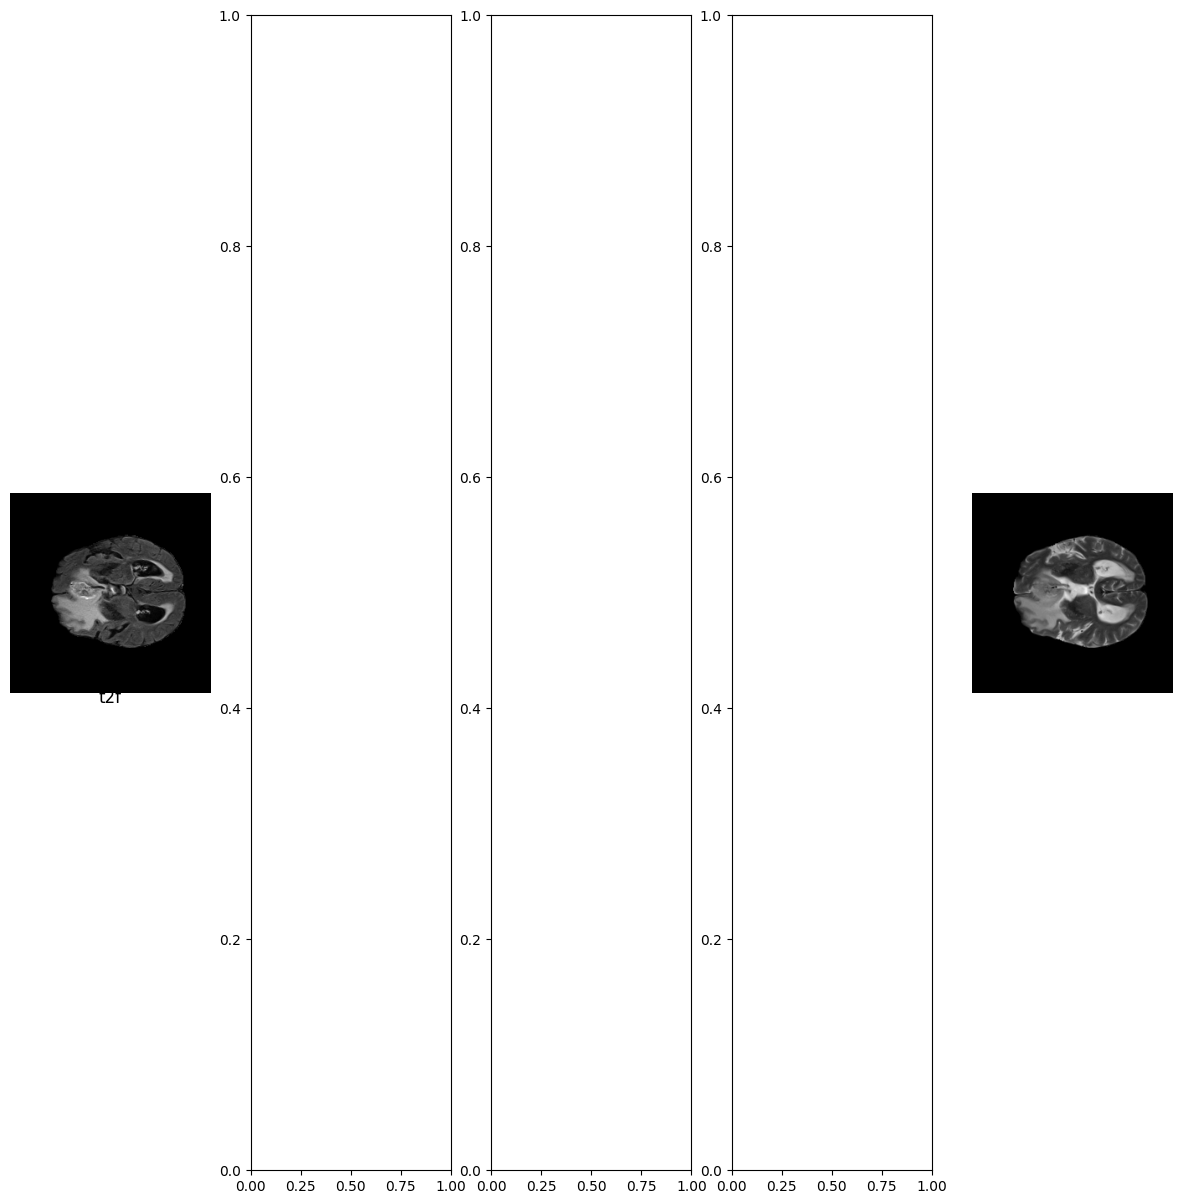

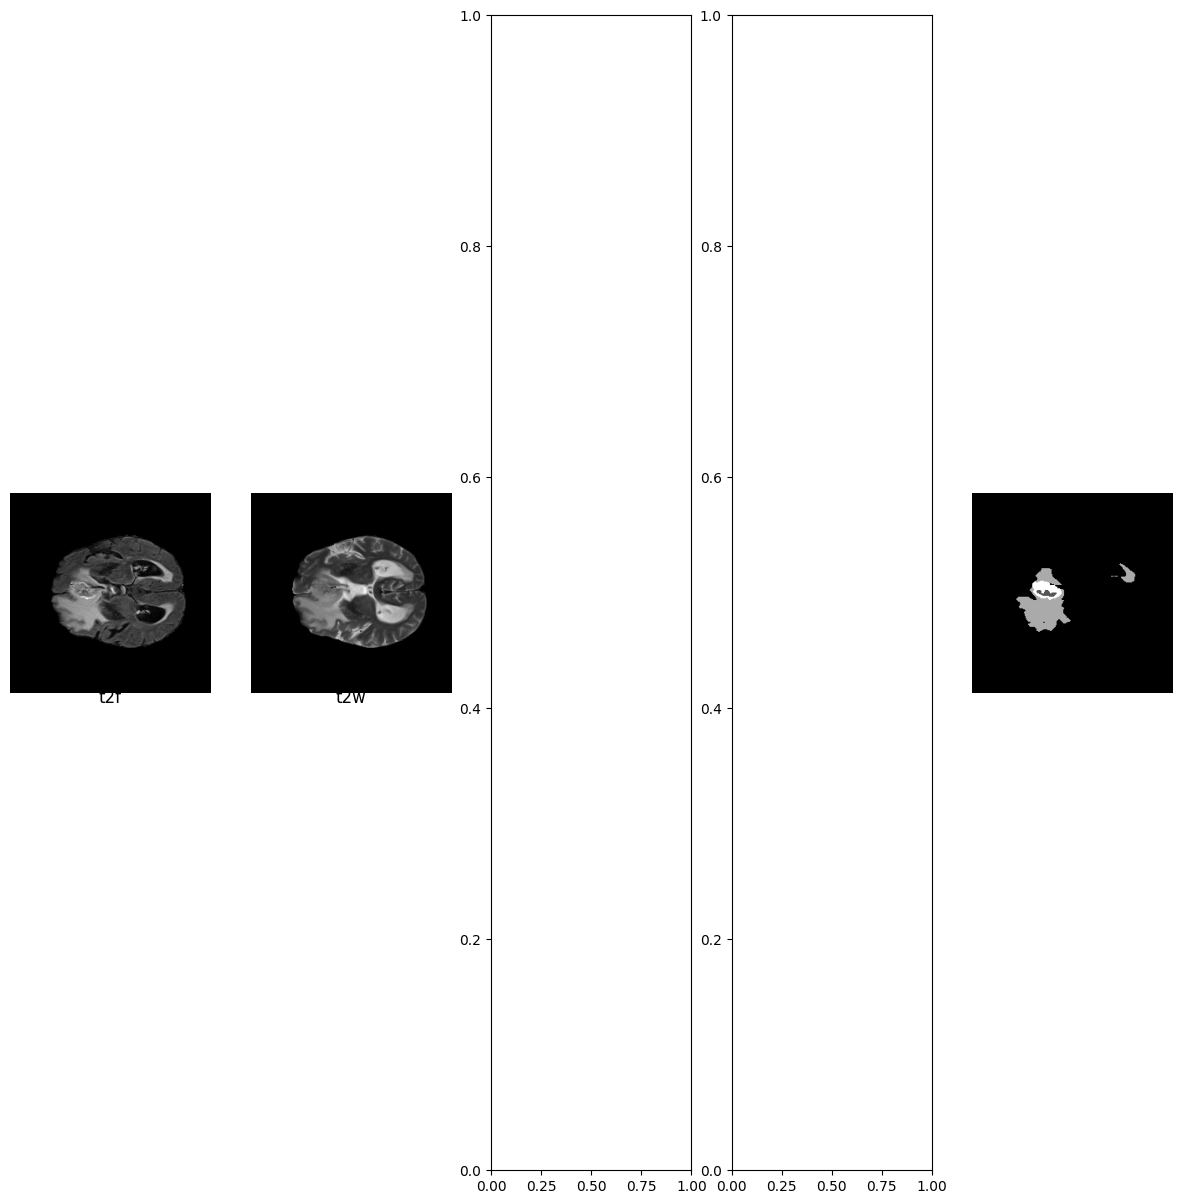

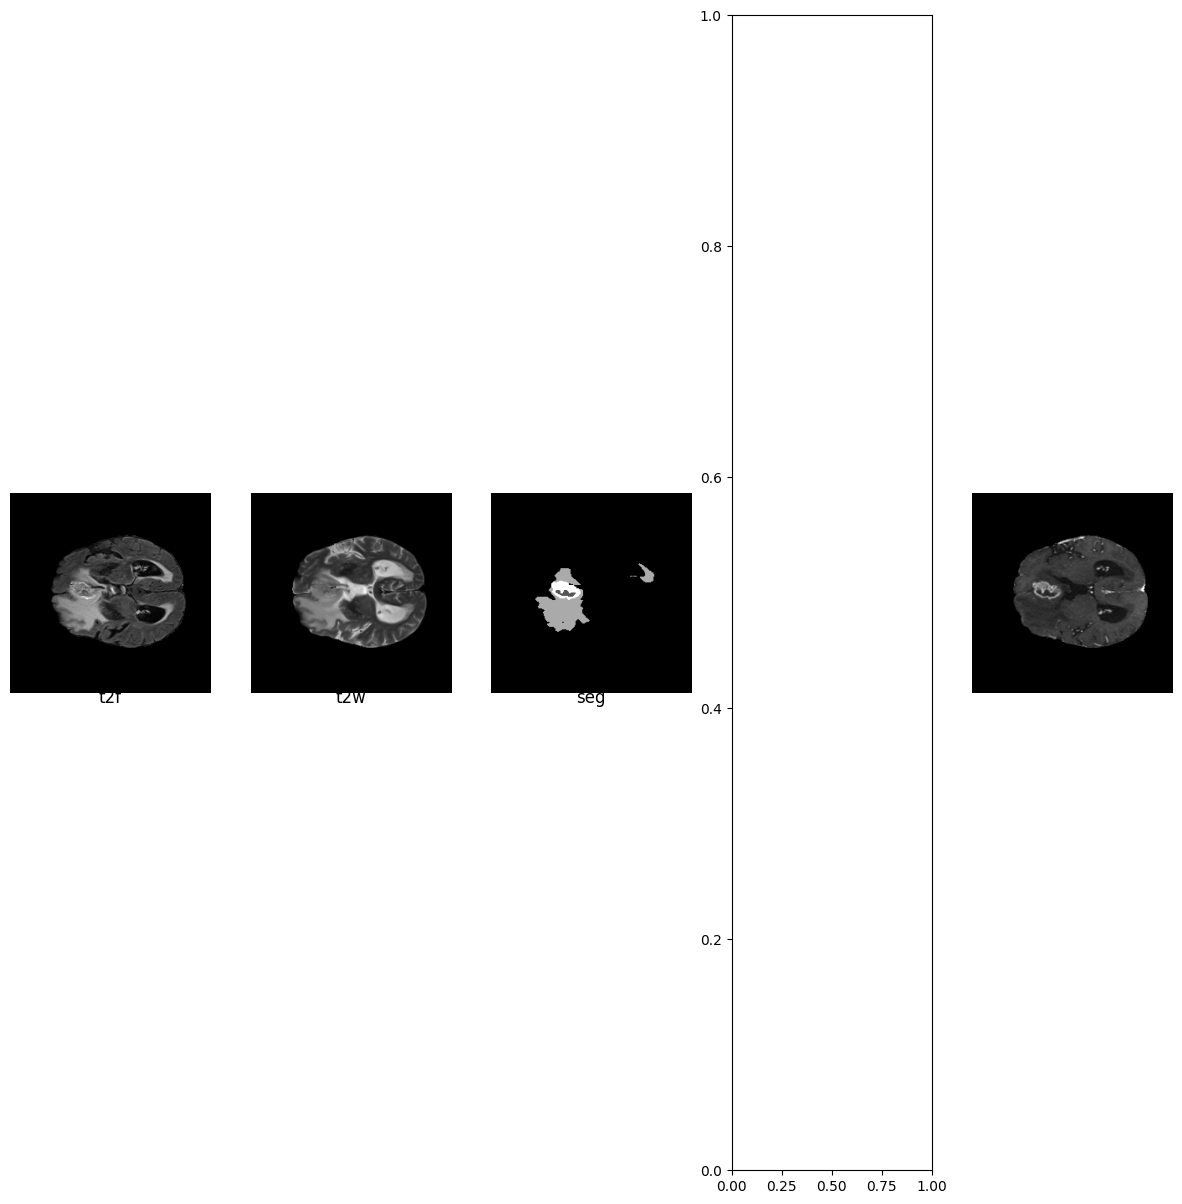

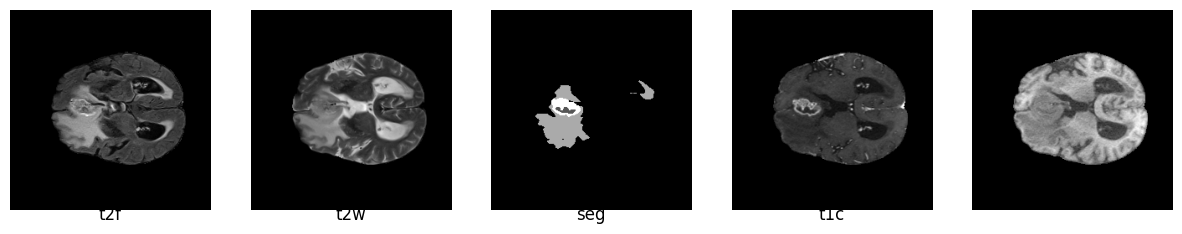

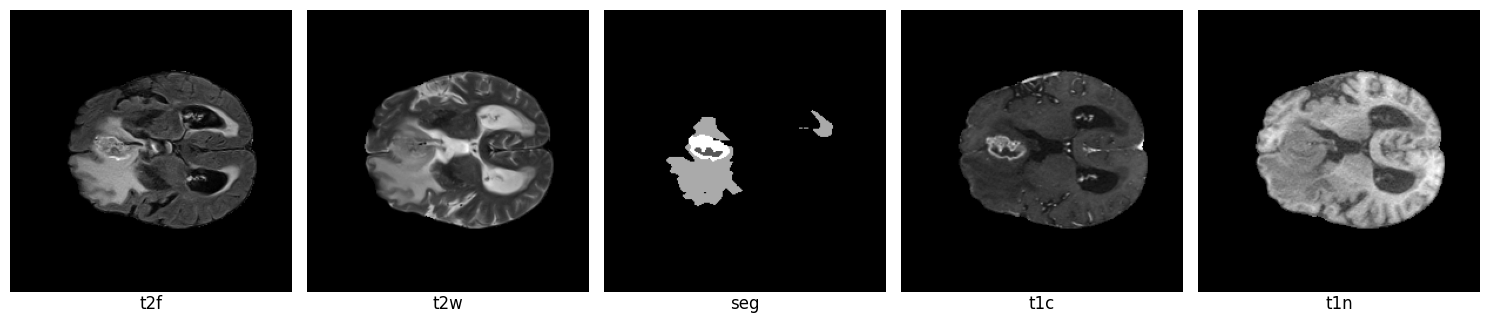

In [401]:
def choose_folder(GLI_directory):
    # Get a list of all the folders in the specified directory path
    GLI_folders = [folder for folder in os.listdir(GLI_directory) if os.path.isdir(os.path.join(GLI_directory, folder))]

    # Randomly select a folder from the list
    selected_folder = random.choice(GLI_folders)

    print(selected_folder)
    # Get the complete path of the selected folder
    GLI_folder_path = os.path.join(GLI_directory, selected_folder)

    # Get a list of all the files inside the selected folder
    GLI_files = os.listdir(GLI_folder_path)
    print(GLI_files)
    #random_number = random.randint(0, 61)
    use_file = random.choice(GLI_files)
    selected_subfolder_path = os.path.join(GLI_directory, selected_folder, use_file)
    print(selected_subfolder_path)
    #mod_files = os.listdir(selected_subfolder_path)
    #print(mod_files)

    dir_list = os.listdir(selected_subfolder_path)
    GLI_output_path = "/content/sample_data/GLI_output"
    if not os.path.exists(GLI_output_path):
      os.mkdir(GLI_output_path)
    # Print the files in the folder

    # Load the image


    images_loop = []
    mod_labels = []
    for item in dir_list:

        print(item)
        item_path = os.path.join(selected_subfolder_path, item)
        print(item_path)
        if os.path.isfile(item_path):
          # display the image

          img = nib.load(item_path)

          data = np.array(img.dataobj)


          base_name = os.path.basename(item_path)
          base_name_without_extension = base_name[:-7]
          parts = base_name_without_extension.split("-")
          other = base_name_without_extension.split("-")
          mod_type = parts[-1]
          Patient = other[-3]
          print(Patient)

          #nifti_data = nifti_file.get_fdata()
          image = data[:, :, 75]
          plt.imshow(image, cmap='gray')
          plt.axis('off')

          images_loop.append(image)
          mod_labels.append(mod_type)
          print(mod_labels)
          plt.savefig(os.path.join(GLI_output_path + "-" + Patient + "-" +  mod_type + '.eps'))
          #plt.show()

        fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 15))

        #labels = ["(a)", "(b)", "(c)", "(d)", "(e)"]
        for i, img in enumerate(images_loop):
         ax[i].imshow(img, cmap='gray')
         ax[i].axis('off')
         ax[i].set_title(mod_labels[i], y=-0.09)

    subplot_path = "/content/sample_data/subplot_GLI/"
    if not os.path.exists(subplot_path):
      os.mkdir(subplot_path)
    plt.tight_layout()
    plt.savefig(os.path.join(subplot_path + "GLI" + "-" +  Patient +  '.eps'), bbox_inches='tight')
    plt.show()

choose_folder(GLI_directory)